In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import nltk.tag
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet') 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

from numpy import array
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.layers import Input
from keras.layers.merge import Concatenate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text_with_0_1=pd.read_csv('/content/drive/MyDrive/NLP_dataset/Train.csv')

anxious_texts=pd.read_csv('/content/drive/MyDrive/NLP_dataset/Anxious_Tweets.csv')
lonely_texts=pd.read_csv('/content/drive/MyDrive/NLP_dataset/Lonely_Tweets.csv')
normal_texts=pd.read_csv('/content/drive/MyDrive/NLP_dataset/Normal_Tweets.csv')
stressed_texts=pd.read_csv('/content/drive/MyDrive/NLP_dataset/Stressed_Tweets.csv')

In [ ]:
text_with_0_1.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
text_with_0_1.shape

(40000, 2)

In [ ]:
for i in range(len(text_with_0_1['text'])):
  text_with_0_1['text'][i]=text_with_0_1['text'][i].lower()
  re.sub('[^A-Za-z0-9]+', '', text_with_0_1['text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
text_with_0_1.head()

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
text_token=[]
for i in text_with_0_1['text']:
  text_token.append((word_tokenize(i)))

In [ ]:
len(text_token)

40000

In [ ]:
text_with_0_1['text_token']=text_token

In [ ]:
text_with_0_1.head()

,text,label,text_token
0,i grew up (b. 1965) watching and loving the th...,0,"[i, grew, up, (, b, ., 1965, ), watching, and,..."
1,"when i put this movie in my dvd player, and sa...",0,"[when, i, put, this, movie, in, my, dvd, playe..."
2,why do people who do not know what a particula...,0,"[why, do, people, who, do, not, know, what, a,..."
3,even though i have great interest in biblical ...,0,"[even, though, i, have, great, interest, in, b..."
4,im a die hard dads army fan and nothing will e...,1,"[im, a, die, hard, dads, army, fan, and, nothi..."


In [ ]:
fdistribution = nltk.FreqDist(pos_tag(text_with_0_1['text_token'][0]))
vocabulary = fdistribution.keys()
print(vocabulary)

dict_keys([('i', 'NN'), ('grew', 'VBD'), ('up', 'RP'), ('(', '('), ('b', 'NN'), ('.', '.'), ('1965', 'CD'), (')', ')'), ('watching', 'NN'), ('and', 'CC'), ('loving', 'VBG'), ('the', 'DT'), ('thunderbirds', 'NNS'), ('all', 'DT'), ('my', 'PRP$'), ('mates', 'NNS'), ('at', 'IN'), ('school', 'NN'), ('watched', 'VBN'), ('we', 'PRP'), ('played', 'VBD'), ('``', '``'), ("''", "''"), ('before', 'IN'), (',', ','), ('during', 'IN'), ('lunch', 'NN'), ('after', 'IN'), ('wanted', 'VBD'), ('to', 'TO'), ('be', 'VB'), ('virgil', 'JJ'), ('or', 'CC'), ('scott', 'NN'), ('no', 'DT'), ('one', 'NN'), ('alan', 'JJ'), ('counting', 'VBG'), ('down', 'RP'), ('from', 'IN'), ('5', 'CD'), ('became', 'VBD'), ('an', 'DT'), ('art', 'NN'), ('form', 'NN'), ('took', 'VBD'), ('children', 'NNS'), ('see', 'VB'), ('movie', 'NN'), ('hoping', 'NN'), ('they', 'PRP'), ('would', 'MD'), ('get', 'VB'), ('a', 'DT'), ('glimpse', 'NN'), ('of', 'IN'), ('what', 'WP'), ('loved', 'VBD'), ('as', 'IN'), ('child', 'NN'), ('how', 'WRB'), ('bitt

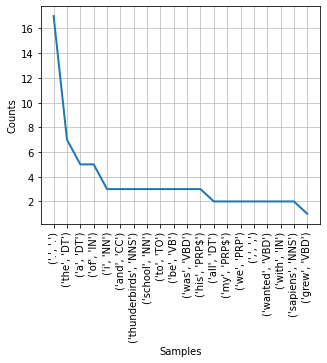

In [ ]:
fdistribution.plot(20)

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf = True,use_idf = True)
train_vectors = vectorizer.fit_transform(text_with_0_1['text'])
test_vectors = vectorizer.transform(text_with_0_1['text'])

In [ ]:
print(train_vectors)

  (0, 44124)	0.122240307161902
  (0, 27690)	0.12259662688282641
  (0, 39596)	0.07552180513912721
  (0, 79390)	0.19036508337694363
  (0, 71308)	0.28528348030113954
  (0, 38957)	0.14039374554154288
  (0, 50896)	0.1711843451579934
  (0, 68259)	0.1331492157979092
  (0, 12410)	0.02329823143176297
  (0, 1803)	0.10936252271993327
  (0, 51541)	0.05663903123071667
  (0, 67957)	0.08846926444633593
  (0, 14342)	0.09639694897760799
  (0, 70335)	0.09760149968272457
  (0, 87487)	0.09884910604547568
  (0, 30337)	0.02773444940118462
  (0, 89550)	0.0694764435635956
  (0, 39136)	0.11631550375616974
  (0, 17255)	0.06483579848345945
  (0, 88188)	0.0680664261662091
  (0, 14396)	0.10837865340133428
  (0, 23109)	0.08474242204670554
  (0, 40851)	0.01969184334110462
  (0, 36721)	0.07294183886302442
  (0, 74285)	0.04940561243075885
  :	:
  (39999, 76783)	0.09917758473806366
  (39999, 34727)	0.04318245981876005
  (39999, 28587)	0.11396497534277891
  (39999, 36359)	0.04888963361927136
  (39999, 82529)	0.050607768

In [ ]:
print(test_vectors)

  (0, 91425)	0.037111831280257794
  (0, 90964)	0.040339324239705036
  (0, 90558)	0.06624040237128775
  (0, 90151)	0.03361931982099459
  (0, 89717)	0.072769414413633
  (0, 89585)	0.050327222488438184
  (0, 89579)	0.06149099652974062
  (0, 89550)	0.0694764435635956
  (0, 89510)	0.052836909845876336
  (0, 89385)	0.11880545508684463
  (0, 88619)	0.15300153913421605
  (0, 88188)	0.06806642616620909
  (0, 87487)	0.09884910604547567
  (0, 87199)	0.035990347195308754
  (0, 85005)	0.10744728270623502
  (0, 83483)	0.07313138420229788
  (0, 83225)	0.03891951227103337
  (0, 82769)	0.3041404775674627
  (0, 82430)	0.03216095621970034
  (0, 82323)	0.08027937980274982
  (0, 82262)	0.051877047082576636
  (0, 82245)	0.021162213939437974
  (0, 82229)	0.10236803061162615
  (0, 81789)	0.07940857832823403
  (0, 79390)	0.19036508337694363
  :	:
  (39999, 24139)	0.0850297908082796
  (39999, 24087)	0.10695980037813269
  (39999, 20920)	0.08354012600984934
  (39999, 17032)	0.10459284928944593
  (39999, 15631)	0.

SVM

In [ ]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors,text_with_0_1['label'] )
prediction_linear = classifier_linear.predict(test_vectors)

In [ ]:
print(prediction_linear)

[0 0 0 ... 0 1 1]


In [ ]:
report_svm = classification_report(text_with_0_1['label'] , prediction_linear, output_dict=True)
print("Negativity report: ",report_svm['0'])
print("Positivity report: ",report_svm['1'])

Negativity report:  {'precision': 0.9656557541675035, 'recall': 0.9606873470203307, 'f1-score': 0.9631651433579567, 'support': 20019}
Positivity report:  {'precision': 0.9608145787691695, 'recall': 0.9657674791051499, 'f1-score': 0.9632846624235618, 'support': 19981}


In [ ]:
review1 = """SUPERB, I AM IN LOVE IN THIS PHONE"""
review_vector1 = vectorizer.transform([review1])
print(classifier_linear.predict(review_vector1))

[1]


In [ ]:
review2 = """Do not purchase this product. My cell phone blast when I switched the charger"""
review_vector2 = vectorizer.transform([review2])
print(classifier_linear.predict(review_vector2))

[0]


In [ ]:
review3="""i feel really bad"""
review_vector3 = vectorizer.transform([review3])
print(classifier_linear.predict(review_vector3))

[0]


Naive Bayes

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train_vectors,text_with_0_1['label'])
naive_bayes_pred = naive_bayes.predict(test_vectors)

In [ ]:
report_nb = classification_report(text_with_0_1['label'] , naive_bayes_pred, output_dict=True)
print("Negativity report: ",report_nb['0'])
print("Positivity report: ",report_nb['1'])

Negativity report:  {'precision': 0.8881859573448359, 'recall': 0.9257205654628103, 'f1-score': 0.9065649153703159, 'support': 20019}
Positivity report:  {'precision': 0.9222889992160962, 'recall': 0.8832390771232671, 'f1-score': 0.9023417527354535, 'support': 19981}


In [ ]:
review4 = """this article is not of my interest, i feel it is less informative"""
review_vector4 = vectorizer.transform([review4])
print(classifier_linear.predict(review_vector4))

[0]


In [ ]:
review5="""i scored good marks and i am happy today"""
review_vector5 = vectorizer.transform([review5])
print(classifier_linear.predict(review_vector5))

[1]


Logistic Regression

In [ ]:
logistic=LogisticRegression(random_state=0)
logistic.fit(train_vectors,text_with_0_1['label'])
logistic_pred=logistic.predict(test_vectors)

In [ ]:
report_logi = classification_report(text_with_0_1['label'] , logistic_pred, output_dict=True)
print("Negativity report: ",report_logi['0'])
print("Positivity report: ",report_logi['1'])

Negativity report:  {'precision': 0.942188923762276, 'recall': 0.929716769069384, 'f1-score': 0.9359112966082519, 'support': 20019}
Positivity report:  {'precision': 0.930504791069841, 'recall': 0.9428457034182474, 'f1-score': 0.9366345986526462, 'support': 19981}


In [ ]:
review6="""i am thankfull because he helped me today and i am joyous about it"""
review_vector6 = vectorizer.transform([review6])
print(classifier_linear.predict(review_vector6))

[1]


In [ ]:
review7="""This cookie tastes very bitter, i would not recommend it"""
review_vector7 = vectorizer.transform([review7])
print(classifier_linear.predict(review_vector7))

[1]


Random Forest

In [ ]:
rand_forest = RandomForestClassifier(max_depth=15, random_state=0)
rand_forest.fit(train_vectors,text_with_0_1['label'])
rand_forest_pred=rand_forest.predict(test_vectors)

In [ ]:
report_rand = classification_report(text_with_0_1['label'] , rand_forest_pred, output_dict=True)
print("Negativity report: ",report_rand['0'])
print("Positivity report: ",report_rand['1'])

Negativity report:  {'precision': 0.9267287518732605, 'recall': 0.8649283180978071, 'f1-score': 0.8947626798956153, 'support': 20019}
Positivity report:  {'precision': 0.8731469318821542, 'recall': 0.9314849106651318, 'f1-score': 0.9013729810882146, 'support': 19981}


In [ ]:
review8="""i love swimming and these swimming glasses are very useful"""
review_vector8 = vectorizer.transform([review8])
print(classifier_linear.predict(review_vector8))

[1]


In [ ]:
review9="""the swimming pool has dirty water, it is very bad"""
review_vector9 = vectorizer.transform([review9])
print(classifier_linear.predict(review_vector9))

[0]


Precision comparison

[]

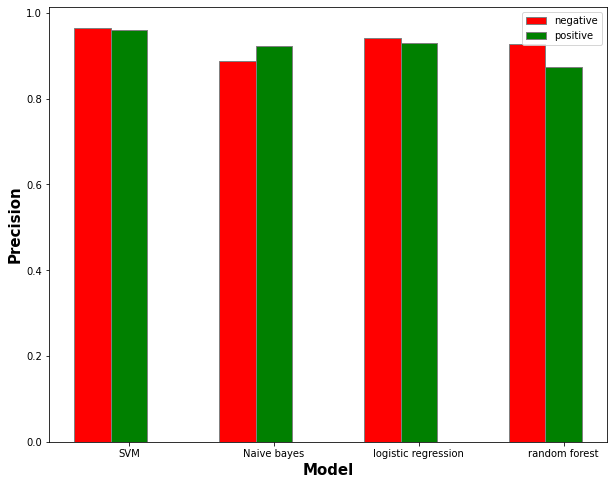

In [ ]:
import matplotlib.pyplot as plt
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))

negative_all=[report_svm['0']['precision'],report_nb['0']['precision'],report_logi['0']['precision'],report_rand['0']['precision']]
positive_all=[report_svm['1']['precision'],report_nb['1']['precision'],report_logi['1']['precision'],report_rand['1']['precision']]

br1 = np.arange(len(negative_all))
br2 = [x + barWidth for x in br1]

plt.bar(br1, negative_all, color ='r', width = barWidth,
        edgecolor ='grey', label ='negative')
plt.bar(br2, positive_all, color ='g', width = barWidth,
        edgecolor ='grey', label ='positive')

plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(negative_all))],
        ['SVM','Naive bayes','logistic regression','random forest'])

plt.legend()
plt.plot()

LSTM

In [ ]:
text_with_0_1.head()

,text,label,text_token
0,i grew up (b. 1965) watching and loving the th...,0,"[i, grew, up, (, b, ., 1965, ), watching, and,..."
1,"when i put this movie in my dvd player, and sa...",0,"[when, i, put, this, movie, in, my, dvd, playe..."
2,why do people who do not know what a particula...,0,"[why, do, people, who, do, not, know, what, a,..."
3,even though i have great interest in biblical ...,0,"[even, though, i, have, great, interest, in, b..."
4,im a die hard dads army fan and nothing will e...,1,"[im, a, die, hard, dads, army, fan, and, nothi..."


In [ ]:
text_data=text_with_0_1['text'].values
label_data=text_with_0_1['label'].values

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(text_data, label_data, stratify = label_data)

In [ ]:
vocab_size = 3000 
oov_tok = ''
embedding_dim = 100
max_length = 200 
padding_type='post'
trunc_type='post'
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 24)                3096      
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 256s 297ms/step - loss: 0.4546 - accuracy: 0.7861 - val_loss: 0.3881 - val_accuracy: 0.8200
Epoch 2/5
844/844 [==============================] - 212s 251ms/step - loss: 0.3130 - accuracy: 0.8741 - val_loss: 0.3501 - val_accuracy: 0.8570
Epoch 3/5
844/844 [==============================] - 214s 254ms/step - loss: 0.2596 - accuracy: 0.8959 - val_loss: 0.3184 - val_accuracy: 0.8677
Epoch 4/5
844/844 [==============================] - 211s 250ms/step - loss: 0.2474 - accuracy: 0.9033 - val_loss: 0.3561 - val_accuracy: 0.8643
Epoch 5/5
844/844 [==============================] - 212s 251ms/step - loss: 0.2063 - accuracy: 0.9211 - val_loss: 0.3248 - val_accuracy: 0.8600


In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
lstm1=accuracy_score(test_labels,pred_labels)
print("Accuracy of prediction on test set : ", lstm1)

Accuracy of prediction on test set :  0.8687


In [ ]:
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this", 
            "the movie plot is terrible but it had good acting"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

The movie was very touching and heart whelming
Predicted sentiment :  Positive
I have never seen a terrible movie like this
Predicted sentiment :  Negative
the movie plot is terrible but it had good acting
Predicted sentiment :  Negative


Dataset 1 summary
ML and deep learning models provide  precison on this dataset in the range 
*   88.88-96.56 for negative class
*   87.30-96.08 for positice class



Anxious dataset

In [ ]:
anxious_texts.head()

,Unnamed: 0,0
0,0.0,alone time precious love alone want spend time...
1,1.0,wanna vent dont feel safe venting cause right ...
2,2.0,shit brings back cause know love care even fee...
3,3.0,tweet purely afraid go lonely nigga dont like ...
4,4.0,im gonna take shower im sure help calm know ca...


In [ ]:
anxious_texts.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [ ]:
anxious_texts.drop('Unnamed: 0', axis=1, inplace=True)
anxious_texts.rename(columns={'0':"text"},inplace =True)

In [ ]:
for i in range(len(anxious_texts['text'])):
  anxious_texts['text'][i]=anxious_texts['text'][i].lower()
  re.sub('[^A-Za-z0-9]+', '', anxious_texts['text'][i])

In [ ]:
anx=[]
for i in range(len(anxious_texts)):
  anx.append('anxious')

anxious_texts['label']=anx

In [ ]:
anxious_texts.head()

,text,label
0,alone time precious love alone want spend time...,anxious
1,wanna vent dont feel safe venting cause right ...,anxious
2,shit brings back cause know love care even fee...,anxious
3,tweet purely afraid go lonely nigga dont like ...,anxious
4,im gonna take shower im sure help calm know ca...,anxious


In [ ]:
anxious_texts.shape

(10509, 2)

Lonely dataset

In [ ]:
lonely_texts.head()

,Unnamed: 0,0
0,0.0,alone time precious love alone want spend time...
1,1.0,wanna vent dont feel safe venting cause right ...
2,2.0,shit brings back cause know love care even fee...
3,3.0,tweet purely afraid go lonely nigga dont like ...
4,4.0,im gonna take shower im sure help calm know ca...


In [ ]:
lonely_texts.drop('Unnamed: 0', axis=1, inplace=True)
lonely_texts.rename(columns={'0':"text"},inplace =True)

In [ ]:
for i in range(len(lonely_texts['text'])):
  lonely_texts['text'][i]=lonely_texts['text'][i].lower()
  re.sub('[^A-Za-z0-9]+', '', lonely_texts['text'][i])

In [ ]:
lon=[]
for i in range(len(lonely_texts)):
  lon.append('lonely')

lonely_texts['label']=lon

In [ ]:
lonely_texts.head()

,text,label
0,alone time precious love alone want spend time...,lonely
1,wanna vent dont feel safe venting cause right ...,lonely
2,shit brings back cause know love care even fee...,lonely
3,tweet purely afraid go lonely nigga dont like ...,lonely
4,im gonna take shower im sure help calm know ca...,lonely


In [ ]:
lonely_texts.shape

(8522, 2)

Normal dataset

In [ ]:
normal_texts.head()

,Unnamed: 0,cleaned_text
0,0,remember hillary email non secure server
1,1,cant avoid demon
2,2,por fin la pusieron en spotify losing way de f...
3,3,kills
4,4,thank introduce important gunsense law make co...


In [ ]:
normal_texts.rename(columns={'cleaned_text':"text"},inplace =True)

In [ ]:
for i in range(len(normal_texts['text'])):
  normal_texts['text'][i]=normal_texts['text'][i].lower()
  re.sub('[^A-Za-z0-9]+', '', normal_texts['text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nor=[]
for i in range(len(normal_texts)):
  nor.append('normal')

normal_texts['label']=nor

In [ ]:
normal_texts.head()

,Unnamed: 0,text,label
0,0,remember hillary email non secure server,normal
1,1,cant avoid demon,normal
2,2,por fin la pusieron en spotify losing way de f...,normal
3,3,kills,normal
4,4,thank introduce important gunsense law make co...,normal


In [ ]:
normal_texts.shape

(9925, 3)

Stressed dataset

In [ ]:
stressed_texts.head()

,cleaned_text
0,tired wish could sleep
1,young sad tire
2,im sad doyo wkwk worry
3,nikita tomar dr priyanka reddy naina kaur tire...
4,tommy least amount power one human character s...


In [ ]:
stressed_texts.rename(columns={'cleaned_text':"text"},inplace =True)

In [ ]:
for i in range(len(stressed_texts['text'])):
  stressed_texts['text'][i]=stressed_texts['text'][i].lower()
  re.sub('[^A-Za-z0-9]+', '', stressed_texts['text'][i])

In [ ]:
stre=[]
for i in range(len(stressed_texts)):
  stre.append('stressed')

stressed_texts['label']=stre

In [ ]:
stressed_texts.head()

,text,label
0,tired wish could sleep,stressed
1,young sad tire,stressed
2,im sad doyo wkwk worry,stressed
3,nikita tomar dr priyanka reddy naina kaur tire...,stressed
4,tommy least amount power one human character s...,stressed


In [ ]:
stressed_texts.shape

(8535, 2)

New dataset of combined emotions

In [ ]:
emotions_data=pd.concat([normal_texts,lonely_texts,stressed_texts,anxious_texts])
emo_data2 =emotions_data

In [ ]:
emotions_data.shape

(37491, 3)

In [ ]:
emotions_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
emotions_data.head(12000)

,text,label
0,remember hillary email non secure server,normal
1,cant avoid demon,normal
2,por fin la pusieron en spotify losing way de f...,normal
3,kills,normal
4,thank introduce important gunsense law make co...,normal
...,...,...
2070,joses salinas area vegetable worker work field...,lonely
2071,ask weedman could bring amp say yeah need watc...,lonely
2072,advisor tell instead try game market need put ...,lonely
2073,ring need rings,lonely


In [ ]:
emotions_data.head(22000)

,text,label
0,remember hillary email non secure server,normal
1,cant avoid demon,normal
2,por fin la pusieron en spotify losing way de f...,normal
3,kills,normal
4,thank introduce important gunsense law make co...,normal
...,...,...
3548,sad thing disinformation truth come damage alr...,stressed
3549,know im fucking sad whyyyy,stressed
3550,im sad attackontitan shingekinokyojin mikasaac...,stressed
3551,sad thing disinformation truth come damage alr...,stressed


In [ ]:
emotions_data.head(36000)

,text,label
0,remember hillary email non secure server,normal
1,cant avoid demon,normal
2,por fin la pusieron en spotify losing way de f...,normal
3,kills,normal
4,thank introduce important gunsense law make co...,normal
...,...,...
9013,hello lovely tofuwraps send sign life im okay ...,anxious
9014,derealisation dont get need like gonna trigger...,anxious
9015,hey find youre applause shop brava know artist...,anxious
9016,friend really want chance participate somethin...,anxious


One hot encoding for categorical data

In [ ]:
emotions_data = pd.get_dummies(emotions_data, columns = ['label'])
emotions_data.head()

,text,label_anxious,label_lonely,label_normal,label_stressed
0,remember hillary email non secure server,0,0,1,0
1,cant avoid demon,0,0,1,0
2,por fin la pusieron en spotify losing way de f...,0,0,1,0
3,kills,0,0,1,0
4,thank introduce important gunsense law make co...,0,0,1,0


In [ ]:
emotions_data_labels = emotions_data[['label_anxious',	'label_lonely',	'label_normal',	'label_stressed']]
emotions_data_labels.head()

,label_anxious,label_lonely,label_normal,label_stressed
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


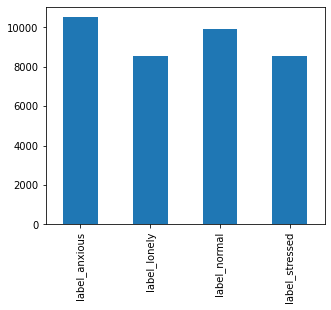

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

emotions_data_labels.sum(axis=0).plot.bar()

In [ ]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
X = []
sentences = list(emotions_data["text"])
for sen in sentences:
    X.append(preprocess_text(sen))
y=emotions_data_labels.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/NLP_dataset/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
LSTM_Layer_2 = LSTM(64)(embedding_layer)
dense_layer_1 = Dense(4, activation='sigmoid')(LSTM_Layer_1)
dense_layer_2 = Dense(4, activation='sigmoid')(LSTM_Layer_2)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 200, 100)          2081500   
                                                                 
 lstm_11 (LSTM)              (None, 128)               117248    
                                                                 
 dense_15 (Dense)            (None, 4)                 516       
                                                                 
Total params: 2,199,264
Trainable params: 117,764
Non-trainable params: 2,081,500
_________________________________________________________________
None


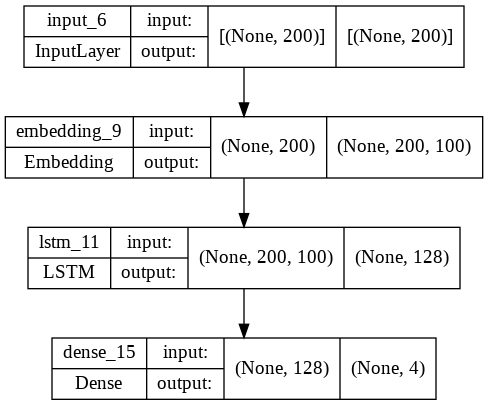

In [ ]:
!pip install plot_model
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 163s 854ms/step - loss: 0.5678 - acc: 0.2736 - val_loss: 0.5620 - val_acc: 0.2749
Epoch 2/5
188/188 [==============================] - 132s 701ms/step - loss: 0.5615 - acc: 0.2800 - val_loss: 0.5612 - val_acc: 0.2749
Epoch 3/5
188/188 [==============================] - 133s 708ms/step - loss: 0.5612 - acc: 0.2777 - val_loss: 0.5616 - val_acc: 0.2667
Epoch 4/5
188/188 [==============================] - 133s 705ms/step - loss: 0.5615 - acc: 0.2782 - val_loss: 0.5624 - val_acc: 0.2749
Epoch 5/5
188/188 [==============================] - 136s 725ms/step - loss: 0.5614 - acc: 0.2784 - val_loss: 0.5614 - val_acc: 0.2749


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

235/235 [==============================] - 22s 93ms/step - loss: 0.5607 - acc: 0.2827
Test Score: 0.5607112646102905
Test Accuracy: 0.28270435333251953


LSTM with one hot encoding gives accuracy 56.11

Using label encoding for categorical data

In [ ]:
emo_data2.shape

In [ ]:
emo_data2.head()

,text,label
0,remember hillary email non secure server,normal
1,cant avoid demon,normal
2,por fin la pusieron en spotify losing way de f...,normal
3,kills,normal
4,thank introduce important gunsense law make co...,normal


,text,label
0,remember hillary email non secure server,normal
1,cant avoid demon,normal
2,por fin la pusieron en spotify losing way de f...,normal
3,kills,normal
4,thank introduce important gunsense law make co...,normal


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
emo_data2['label']= label_encoder.fit_transform(emo_data2['label'])



*   0 - anxious
*   1 - lonely
*   2 - normal
*   3 - stressed



In [ ]:
emo_data2.head(12000)

,text,label
0,remember hillary email non secure server,2
1,cant avoid demon,2
2,por fin la pusieron en spotify losing way de f...,2
3,kills,2
4,thank introduce important gunsense law make co...,2
...,...,...
2070,joses salinas area vegetable worker work field...,1
2071,ask weedman could bring amp say yeah need watc...,1
2072,advisor tell instead try game market need put ...,1
2073,ring need rings,1


In [ ]:
emo_data2.head(22000)

,text,label
0,remember hillary email non secure server,2
1,cant avoid demon,2
2,por fin la pusieron en spotify losing way de f...,2
3,kills,2
4,thank introduce important gunsense law make co...,2
...,...,...
3548,sad thing disinformation truth come damage alr...,3
3549,know im fucking sad whyyyy,3
3550,im sad attackontitan shingekinokyojin mikasaac...,3
3551,sad thing disinformation truth come damage alr...,3


In [ ]:
emo_data2.head(36000)

,text,label
0,remember hillary email non secure server,2
1,cant avoid demon,2
2,por fin la pusieron en spotify losing way de f...,2
3,kills,2
4,thank introduce important gunsense law make co...,2
...,...,...
9013,hello lovely tofuwraps send sign life im okay ...,0
9014,derealisation dont get need like gonna trigger...,0
9015,hey find youre applause shop brava know artist...,0
9016,friend really want chance participate somethin...,0


In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf = True,use_idf = True)
train_vectors_emo = vectorizer.fit_transform(emo_data2['text'])
test_vectors_emo = vectorizer.transform(emo_data2['text'])

In [ ]:
print(train_vectors_emo)

  (0, 19003)	0.4192860278882337
  (0, 18844)	0.4284369072171043
  (0, 14949)	0.4284369072171043
  (0, 7193)	0.38886353867238954
  (0, 10114)	0.4685147109598684
  (0, 17737)	0.2938740781211745
  (1, 6060)	0.6652576422588705
  (1, 2452)	0.6622231136105062
  (1, 3995)	0.3448083775318914
  (2, 13998)	0.3388554718528014
  (2, 21555)	0.2563496295237246
  (2, 8654)	0.259892666856174
  (2, 8264)	0.3388554718528014
  (2, 5862)	0.2493734087137869
  (2, 23063)	0.15793752150604035
  (2, 12963)	0.25748660486797736
  (2, 20039)	0.2451987665405276
  (2, 7259)	0.27586280054714374
  (2, 17126)	0.3388554718528014
  (2, 12240)	0.2451987665405276
  (2, 8175)	0.29183293423811335
  (2, 16570)	0.29551522960163334
  (3, 12020)	1.0
  (4, 18453)	0.43654267550818454
  (4, 5327)	0.29777223376683604
  :	:
  (37490, 20966)	0.2790181522415852
  (37490, 21953)	0.2790181522415852
  (37490, 19268)	0.4422071783251566
  (37490, 6173)	0.2611746831004455
  (37490, 2075)	0.24029916243976177
  (37490, 7234)	0.186768755016342

In [ ]:
print(test_vectors_emo)

  (0, 19003)	0.41928602788823366
  (0, 18844)	0.42843690721710426
  (0, 17737)	0.29387407812117444
  (0, 14949)	0.42843690721710426
  (0, 10114)	0.46851471095986835
  (0, 7193)	0.3888635386723895
  (1, 6060)	0.6652576422588705
  (1, 3995)	0.3448083775318914
  (1, 2452)	0.6622231136105062
  (2, 23063)	0.15793752150604035
  (2, 21555)	0.2563496295237246
  (2, 20039)	0.2451987665405276
  (2, 17126)	0.3388554718528014
  (2, 16570)	0.29551522960163334
  (2, 13998)	0.3388554718528014
  (2, 12963)	0.25748660486797736
  (2, 12240)	0.2451987665405276
  (2, 8654)	0.259892666856174
  (2, 8264)	0.3388554718528014
  (2, 8175)	0.29183293423811335
  (2, 7259)	0.27586280054714374
  (2, 5862)	0.2493734087137869
  (3, 12020)	1.0
  (4, 21151)	0.25413103750750954
  (4, 18453)	0.43654267550818454
  :	:
  (37490, 21953)	0.2790181522415852
  (37490, 21392)	0.21848744099128184
  (37490, 20966)	0.2790181522415852
  (37490, 19777)	0.12380308395218059
  (37490, 19268)	0.4422071783251566
  (37490, 17468)	0.111388

SVM

In [ ]:
classifier_linear_emo = svm.SVC(kernel='linear', C=8,gamma='scale',)
classifier_linear_emo.fit(train_vectors_emo,emo_data2['label'] )
prediction_linear_emo = classifier_linear_emo.predict(test_vectors_emo)

In [ ]:
report_svm_emo = classification_report(emo_data2['label'] , prediction_linear_emo, output_dict=True)
print("Anxious report: ",report_svm_emo['0'])
print("Lonely report: ",report_svm_emo['1'])
print("Normal report: ",report_svm_emo['2'])
print("Stressed report: ",report_svm_emo['3'])

Anxious report:  {'precision': 0.552835193986957, 'recall': 0.9518507945570464, 'f1-score': 0.6994371219802119, 'support': 10509}
Lonely report:  {'precision': 0.5121457489878543, 'recall': 0.05937573339591645, 'f1-score': 0.10641430073606731, 'support': 8522}
Normal report:  {'precision': 0.9957291031116534, 'recall': 0.9865994962216624, 'f1-score': 0.9911432764816034, 'support': 9925}
Stressed report:  {'precision': 0.9885714285714285, 'recall': 0.9932044522554189, 'f1-score': 0.9908825248392753, 'support': 8535}


In [ ]:
review_emo1 = """this is a bad time to talk to me, i am sad """
review_vector_emo1 = vectorizer.transform([review_emo1])
print(classifier_linear_emo.predict(review_vector_emo1))

[3]


Naive bayes

In [ ]:
naive_bayes_emo = MultinomialNB()
naive_bayes_emo.fit(train_vectors_emo,emo_data2['label'])
naive_bayes_pred_emo = naive_bayes_emo.predict(test_vectors_emo)

In [ ]:
report_nb_emo = classification_report(emo_data2['label'] , naive_bayes_pred_emo, output_dict=True)
print("Anxious report: ",report_nb_emo['0'])
print("Lonely report: ",report_nb_emo['1'])
print("Normal report: ",report_nb_emo['2'])
print("Stressed report: ",report_nb_emo['3'])

Anxious report:  {'precision': 0.47451950327201525, 'recall': 0.8762965077552574, 'f1-score': 0.6156571734189062, 'support': 10509}
Lonely report:  {'precision': 0.4992563212692117, 'recall': 0.11816475005867168, 'f1-score': 0.19109972483157794, 'support': 8522}
Normal report:  {'precision': 0.9223842739378567, 'recall': 0.7327959697732997, 'f1-score': 0.8167321729365524, 'support': 9925}
Stressed report:  {'precision': 0.9231239305793204, 'recall': 0.8849443468072642, 'f1-score': 0.903631034276485, 'support': 8535}


In [ ]:
review_emo3 = """bitting nails is a sign of anxiety i noticed it in my dad"""
review_vector_emo3 = vectorizer.transform([review_emo3])
print(naive_bayes_emo.predict(review_vector_emo3))

[0]


In [ ]:
review_emo4 = """He sat all alone in the school"""
review_vector_emo4 = vectorizer.transform([review_emo4])
print(naive_bayes_emo.predict(review_vector_emo4))

[0]


Logistic Regression

In [ ]:
logistic_emo=LogisticRegression(random_state=0,C=3.0,solver='sag',multi_class='multinomial')
logistic_emo.fit(train_vectors_emo,emo_data2['label'])
logistic_pred_emo=logistic_emo.predict(test_vectors_emo)

In [ ]:
report_logi_emo = classification_report(emo_data2['label'] , logistic_pred_emo, output_dict=True)
print("Anxious report: ",report_logi_emo['0'])
print("Lonely report: ",report_logi_emo['1'])
print("Normal report: ",report_logi_emo['2'])
print("Stressed report: ",report_logi_emo['3'])

Anxious report:  {'precision': 0.5683430302064238, 'recall': 0.6785612332286611, 'f1-score': 0.6185808466342817, 'support': 10509}
Lonely report:  {'precision': 0.49609862671660426, 'recall': 0.3730344989439099, 'f1-score': 0.42585398526456797, 'support': 8522}
Normal report:  {'precision': 0.9603119064280716, 'recall': 0.9678589420654912, 'f1-score': 0.9640706543556805, 'support': 9925}
Stressed report:  {'precision': 0.9769131606703387, 'recall': 0.9766842413591096, 'f1-score': 0.9767986876025312, 'support': 8535}


In [ ]:
review_emo5 = """My uncle lost his dog, he must feel very anxious"""
review_vector_emo5 = vectorizer.transform([review_emo5])
print(logistic_emo.predict(review_vector_emo5))

[2]


In [ ]:
review_emo6= """I got a new dog today and i feel complete now"""
review_vector_emo6 = vectorizer.transform([review_emo6])
print(logistic_emo.predict(review_vector_emo6))

[2]


Random Forest

In [ ]:
rand_forest_emo= RandomForestClassifier(max_depth=15, random_state=0,criterion='gini',)
rand_forest_emo.fit(train_vectors_emo,emo_data2['label'])
rand_forest_pred_emo=rand_forest_emo.predict(test_vectors_emo)

In [ ]:
report_rand_emo = classification_report(emo_data2['label'] , rand_forest_pred_emo, output_dict=True)
print("Anxious report: ",report_rand_emo['0'])
print("Lonely report: ",report_rand_emo['1'])
print("Normal report: ",report_rand_emo['2'])
print("Stressed report: ",report_rand_emo['3'])

Anxious report:  {'precision': 0.5181713533958231, 'recall': 0.8995147016842706, 'f1-score': 0.6575542570951587, 'support': 10509}
Lonely report:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8522}
Normal report:  {'precision': 0.7003232839636118, 'recall': 0.9385390428211587, 'f1-score': 0.8021183156807027, 'support': 9925}
Stressed report:  {'precision': 0.9909197914915083, 'recall': 0.6904510837727006, 'f1-score': 0.8138378676978317, 'support': 8535}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
review_emo7 = """When i got to know that i am leading the chess tournament, i felt very happy and confident"""
review_vector_emo7 = vectorizer.transform([review_emo7])
print(rand_forest_emo.predict(review_vector_emo7))

[2]


In [ ]:
review_emo8 = """I have my exams next week, the stress is killing me"""
review_vector_emo8 = vectorizer.transform([review_emo8])
print(rand_forest_emo.predict(review_vector_emo8))


[2]


Precision comparison

[]

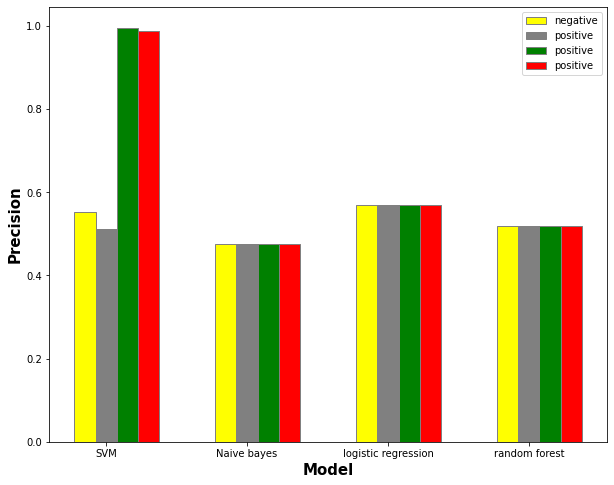

In [ ]:
barWidth = 0.15
fig = plt.subplots(figsize =(10, 8))

anxious_all=[report_svm_emo['0']['precision'],report_nb_emo['0']['precision'],report_logi_emo['0']['precision'],report_rand_emo['0']['precision']]
lonely_all=[report_svm_emo['1']['precision'],report_nb_emo['0']['precision'],report_logi_emo['0']['precision'],report_rand_emo['0']['precision']]
normal_all=[report_svm_emo['2']['precision'],report_nb_emo['0']['precision'],report_logi_emo['0']['precision'],report_rand_emo['0']['precision']]
stressed_all=[report_svm_emo['3']['precision'],report_nb_emo['0']['precision'],report_logi_emo['0']['precision'],report_rand_emo['0']['precision']]

br1 = np.arange(len(negative_all))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, anxious_all, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='negative')
plt.bar(br2, lonely_all, color ='grey', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br3, normal_all, color ='green', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br4, stressed_all, color ='red', width = barWidth,
        edgecolor ='grey', label ='positive')

plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(negative_all))],
        ['SVM','Naive bayes','logistic regression','random forest'])

plt.legend()
plt.plot()

Dataset 2 summary - 
For ML models - 
SVM gives overall highest precison

The dataset for normal and stressed have a very higher range of precison as compared to lonely and anxious

For Deep learning model - 
Accuracy of 56.11 